In [1]:
import random,numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.measure import structural_similarity as ssim
import cv2


In [2]:
def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err


In [31]:
def black(image, no_of_points):

    #black = []
    for points in range(no_of_points):
        rand_row = random.randint(0,len(image)- 1)
        rand_col = random.randint(0,len(image[0]) - 1)
        if((image[rand_row][rand_col] == 1)):
            image[rand_row][rand_col] = 0
            #black.append((rand_row,rand_col))
        else:
            points -= 1
    return image

In [32]:
def createImage(row, col, no_of_points):
    
    Z = np.random.random((row,col))
    img = np.ones((row,col))
    
    #blac = black(img, no_of_points)
    img = black(img, no_of_points)
    """
    for cord in blac:
        img[cord[0], cord[1]] = [0,0,0]
    """
    return img


In [5]:
def newPopulation(pop_max, target_img, num_of_points):
    
    row = len(target)
    col = len(target[0])
    population = []
    for image in range(pop_max):
        im = createImage(row, col, num_of_points)
        population.append(im)
        
    return population

In [177]:
def fitness(image, target):
    
    
    """
    ms = mse(image, target)
    score = 1/(10**(ms))
    return (score**4)*100
    
    """
    score = 0
    for row in range(len(image)):
        for col in range(len(image[0])):
            if(((image[row][col] == 0) and (target[row][col] == 0)) ):
                score += 2
            
    return (2**score)**2
    

In [165]:
def populationFitness(population, target):
    """
    score = []
    min_score = 999
    for image in population:
        fitness_score = fitness(image, target)
        score.append(fitness_score)
        """"""
        if(fitness_score<min_score):
            min_score = fitness_score
        """"""
    
    for i in range(len(score)):
        #score[i] = score[i] - min_score + 1
        score[i] = int (score[i] )
    
    return [population, score]
    """
    score = []
    min_score = 9999999
    for image in population:
        fitness_score = fitness(image, target)
        score.append(fitness_score)
        if(fitness_score<min_score):
            min_score = (fitness_score)
    
    for i in range(len(score)):
        score[i] = score[i] - min_score + 1
        score[i] = int (score[i] )
        
    return [population, score]
    

In [159]:
def matingPool(population_fitness):
    """
    population = population_fitness[0]
    score = population_fitness[1]
    pool = []
    for i in range(len(population)):
        for j in range(score[i]):
            pool.append(population[i])
    return pool
    """
    population = population_fitness[0]
    score = population_fitness[1]
    pool_norm_score = []
    maxm = 0
    for i in range(len(population)):
        if(score[i]>maxm):
            maxm = score[i]
    for i in range(len(population)):
        pool_norm_score.append(score[i]/maxm)
    
    return pool_norm_score
        
    

In [120]:
import random 
def createChild(img1, img2, num_of_points):
    row = len(img1)
    col = len(img1[0])
    black = []
    Z = np.random.random((row,col))
    G = np.ones((row,col))
    num_points = 0
    for i in range(row):
        for j in range(col):
            if((img1[i][j] == 0) and (img2[i][j] == 0)):
                p = 0.9
            elif((img1[i][j] == 0) or (img2[i][j] == 0)):
                p = 0.3
            else:
                p = 0.1
            n = random.random()
            if(n<p):
                G[i][j] = 0
                black.append([i,j])
                num_points += 1
            if(num_points > num_of_points):
                break
    return G,black


In [150]:
"""
def createChildren(pool, pop_max, num_of_points):
    
    population = []
    population_points =[]
    for i in range(pop_max):
        
        rand1 = random.randint(0,len(pool)-1)
        rand2 = random.randint(0,len(pool)-1)
        child,black = createChild(pool[rand1], pool[rand2], num_of_points)
        population.append(child)
        population_points.append(black)
    
    return population,population_points
    
"""
    

'\ndef createChildren(pool, pop_max, num_of_points):\n    \n    population = []\n    population_points =[]\n    for i in range(pop_max):\n        \n        rand1 = random.randint(0,len(pool)-1)\n        rand2 = random.randint(0,len(pool)-1)\n        child,black = createChild(pool[rand1], pool[rand2], num_of_points)\n        population.append(child)\n        population_points.append(black)\n    \n    return population,population_points\n    \n'

In [155]:
"""
import random
def createChildren(pool_norm_score, pop_max, num_of_points,old_population):
    
    population = []
    population_points =[]
    for i in range(pop_max):
        
        index1 = 0
        r = random.random()
        while(r>0):
            r = r - pool_norm_score[index1]
            index1+=1
        
        index1-=1
        
        index2 = 0
        r = random.random()
        while(r>0):
            r = r - pool_norm_score[index2]
            index2+=1
        
        index2-=1
        
       
        child,black = createChild(old_population[index1], old_population[index2], num_of_points)
        population.append(child)
        population_points.append(black)
    
    return population,population_points
"""

In [178]:
import random
def createChildren(pool_norm_score, pop_max, num_of_points,old_population):
    
    population = []
    population_points =[]
    for i in range(pop_max):
        
        index1 = 0
        r = random.random()
        while(r>0):
            r = r - pool_norm_score[index1]
            index1+=1
        
        index1-=1
        
        index2 = 0
        r = random.random()
        while(r>0):
            r = r - pool_norm_score[index2]
            index2+=1
        
        index2-=1
        
       
        child,black = createChild(old_population[index1], old_population[index1], num_of_points)
        population.append(child)
        population_points.append(black)
    
    return population,population_points

In [174]:
import random
def mutateImage(img,black,black_target):
    for i in range(2):
        while(True):
            rand_index = random.randint(0,len(black)-1)
            i_b, j_b = black[rand_index]
            if([i_b,j_b] not in black_target):
                img[i_b][j_b] = 1
                break
        while(True):
            row_rand = random.randint(0,len(img)-1)
            col_rand = random.randint(0,len(img[0])-1)

            if((img[row_rand][col_rand] == 1)):
                img[row_rand][col_rand] = 0
                break
            
        
        
        
    return img

In [175]:
def mutatePopulation(population, chance_of_mutation,population_points,black_target):
    for i in range(len(population)):
        rand = random.randint(0,100)
        black = population_points[i]
        if(rand < chance_of_mutation):
            population[i] = mutateImage(population[i],black,black_target)
    return population


no of generation: 1
1048576


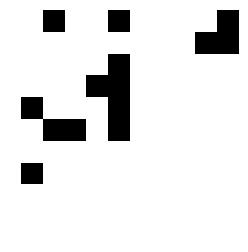

no of generation: 2
1048576


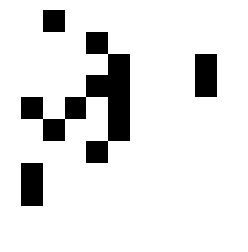

no of generation: 3
1048576


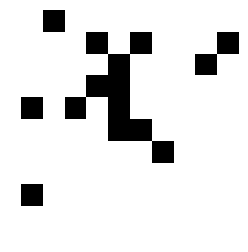

no of generation: 4
1048576


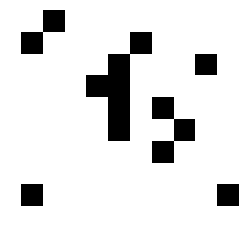

no of generation: 5
1048576


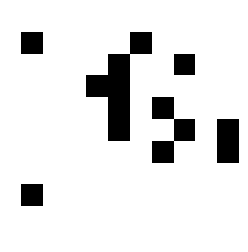

no of generation: 6
1048576


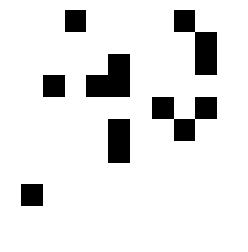

no of generation: 7
1048576


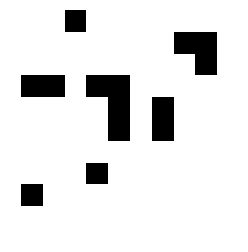

no of generation: 8
1048576


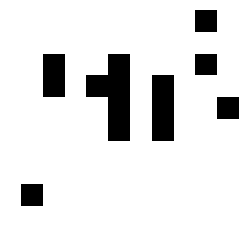

no of generation: 9
1048576


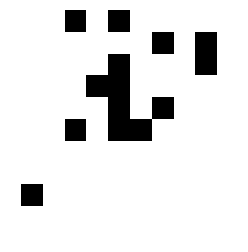

no of generation: 10
1048576


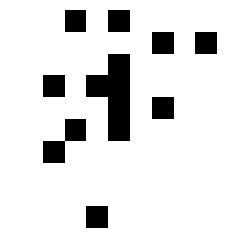

no of generation: 11
1048576


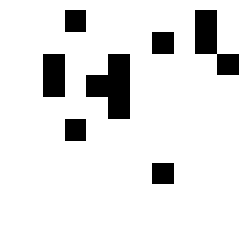

no of generation: 12
1048576


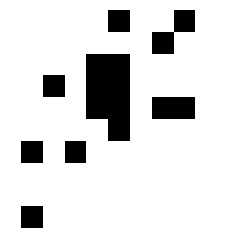

no of generation: 13
1048576


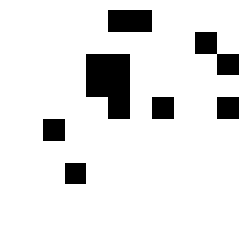

no of generation: 14
1048576


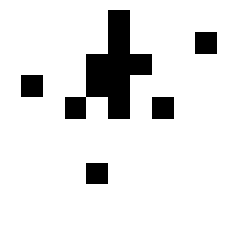

no of generation: 15
1048576


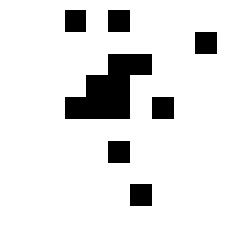

no of generation: 16
1048576


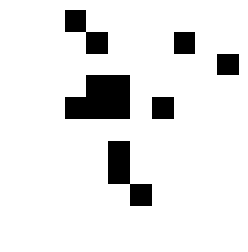

no of generation: 17
1048576


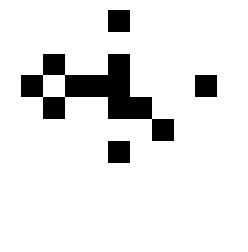

no of generation: 18
16777216


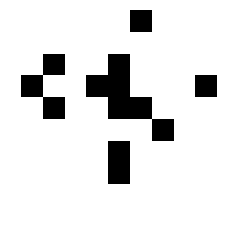

no of generation: 19
16777216


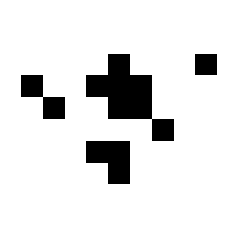

no of generation: 20
16777216


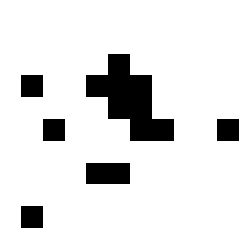

no of generation: 21
16777216


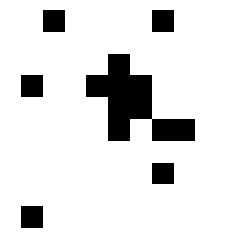

no of generation: 22
16777216


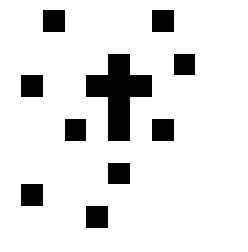

no of generation: 23
16777216


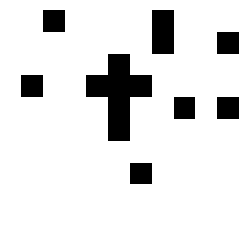

no of generation: 24
1048576


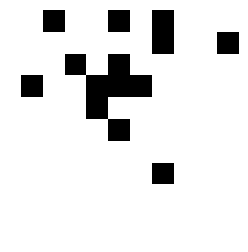

no of generation: 25
65536


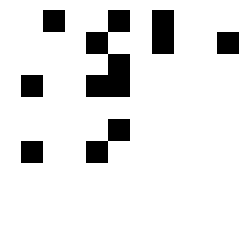

no of generation: 26
1048576


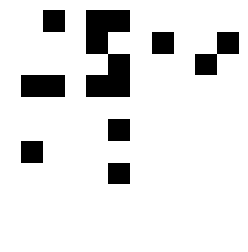

no of generation: 27
65536


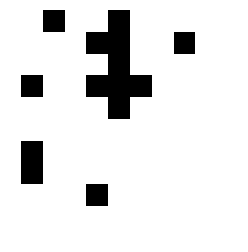

no of generation: 28
16777216


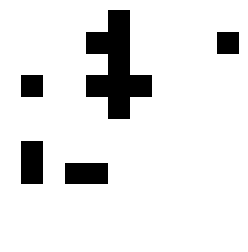

no of generation: 29
1048576


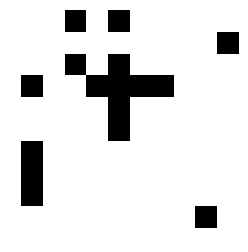

no of generation: 30
16777216


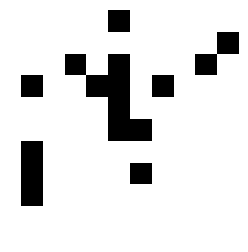

no of generation: 31
16777216


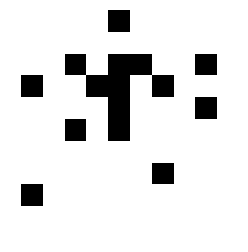

no of generation: 32
16777216


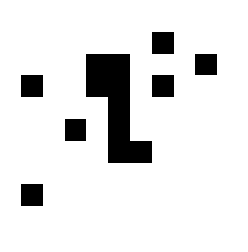

no of generation: 33
16777216


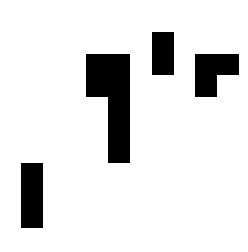

no of generation: 34
16777216


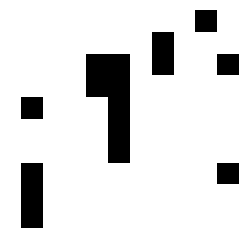

no of generation: 35
16777216


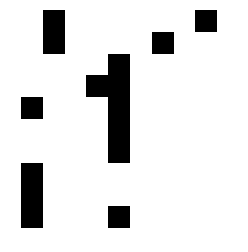

no of generation: 36
268435456


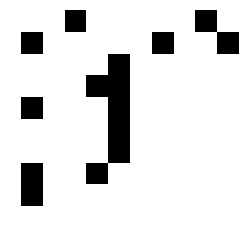

no of generation: 37
268435456


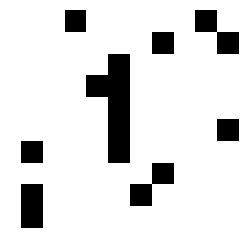

no of generation: 38
268435456


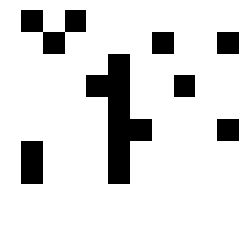

no of generation: 39
16777216


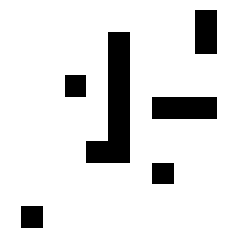

no of generation: 40
1048576


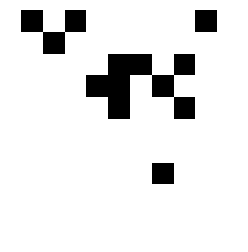

no of generation: 41
1048576


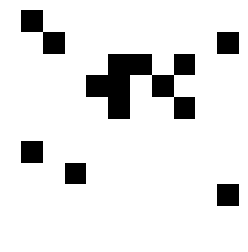

no of generation: 42
1048576


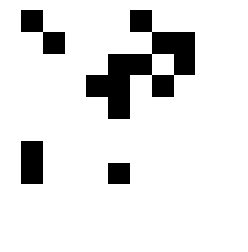

no of generation: 43
1048576


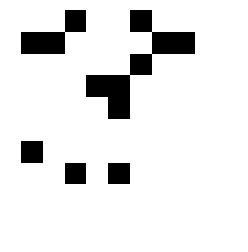

no of generation: 44
1048576


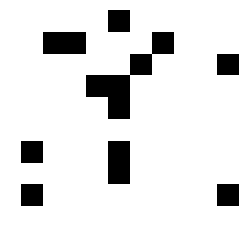

no of generation: 45
1048576


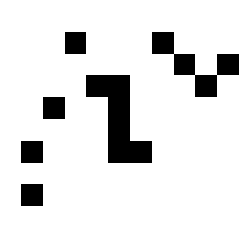

no of generation: 46
1048576


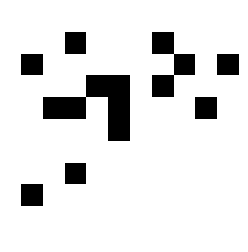

no of generation: 47
65536


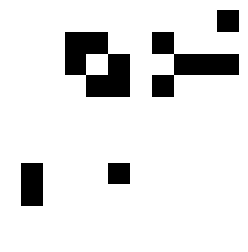

no of generation: 48
1048576


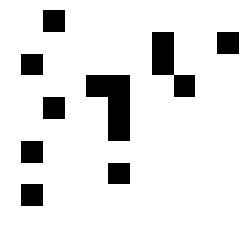

no of generation: 49
1048576


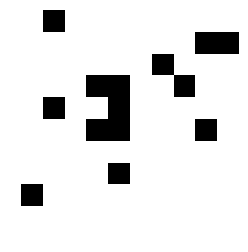

no of generation: 50
1048576


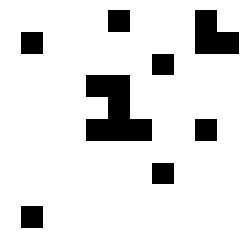

no of generation: 51
1048576


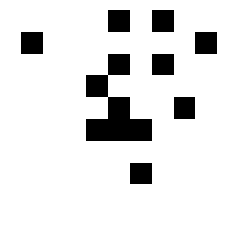

no of generation: 52
1048576


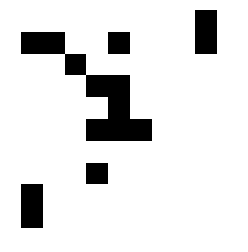

no of generation: 53
16777216


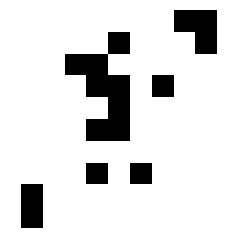

no of generation: 54
16777216


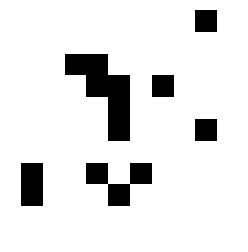

no of generation: 55
16777216


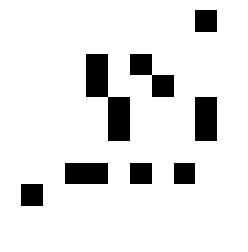

no of generation: 56
268435456


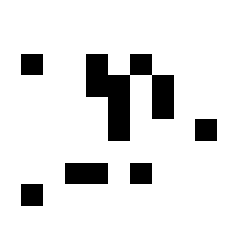

no of generation: 57
16777216


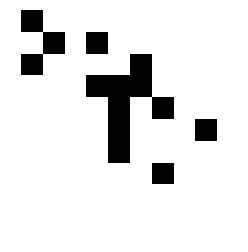

no of generation: 58
1048576


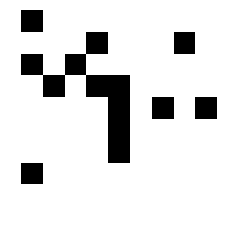

no of generation: 59
1048576


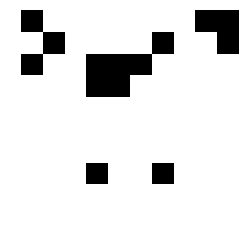

no of generation: 60
65536


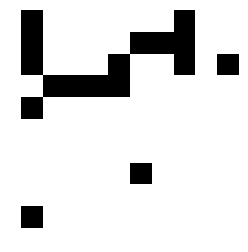

no of generation: 61
1048576


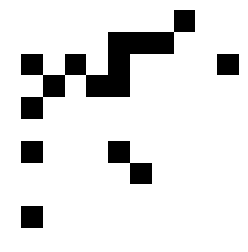

no of generation: 62
16777216


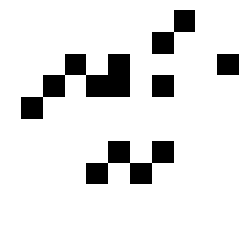

no of generation: 63
16777216


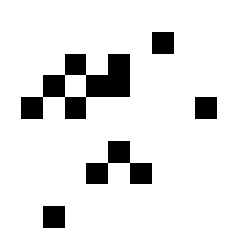

no of generation: 64
1048576


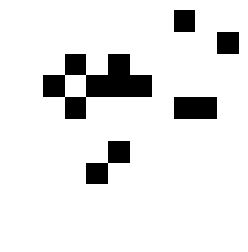

no of generation: 65
1048576


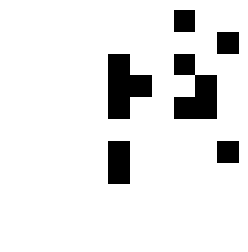

no of generation: 66
1048576


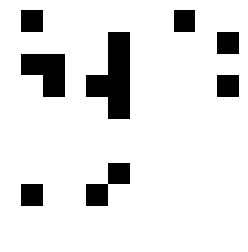

no of generation: 67
1048576


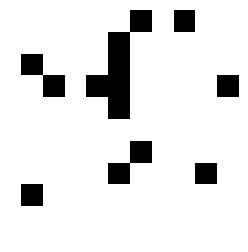

no of generation: 68
1048576


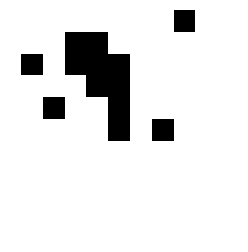

no of generation: 69
268435456


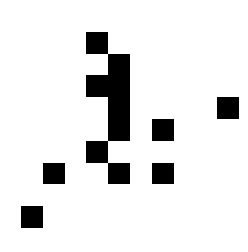

no of generation: 70
16777216


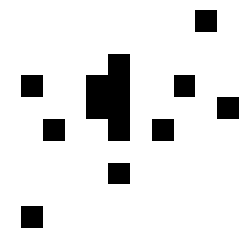

no of generation: 71
16777216


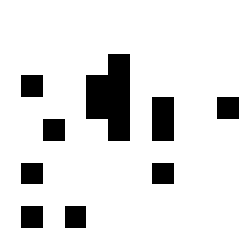

no of generation: 72
268435456


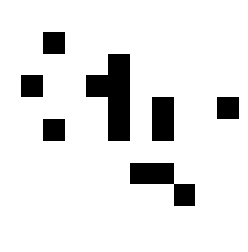

no of generation: 73
268435456


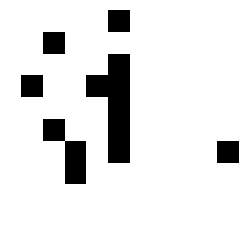

no of generation: 74
268435456


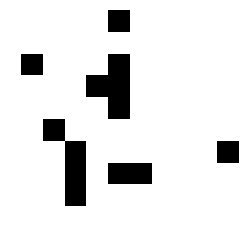

no of generation: 75
16777216


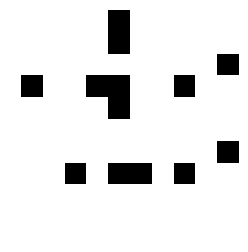

no of generation: 76
16777216


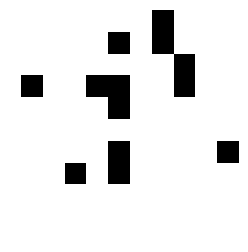

no of generation: 77
268435456


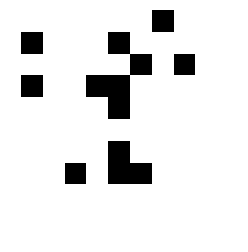

no of generation: 78
16777216


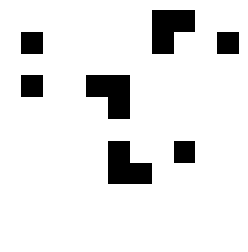

no of generation: 79
1048576


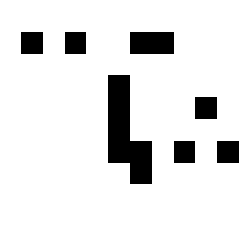

no of generation: 80
16777216


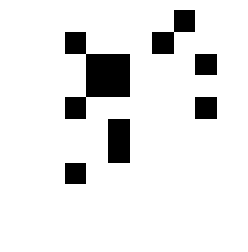

no of generation: 81
268435456


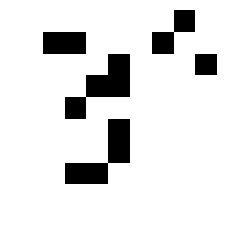

no of generation: 82
16777216


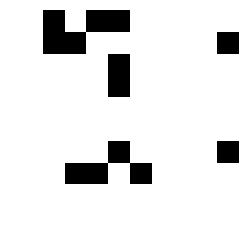

no of generation: 83
1048576


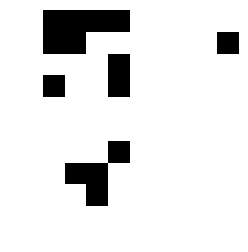

no of generation: 84
65536


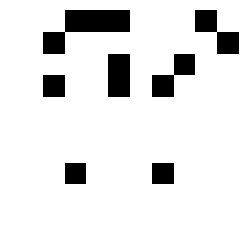

no of generation: 85
16777216


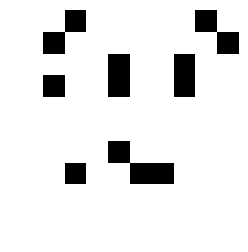

no of generation: 86
16777216


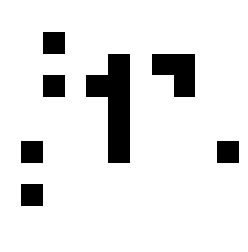

no of generation: 87
268435456


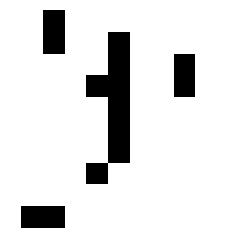

no of generation: 88
268435456


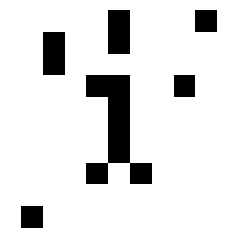

no of generation: 89
268435456


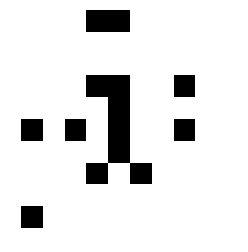

no of generation: 90
268435456


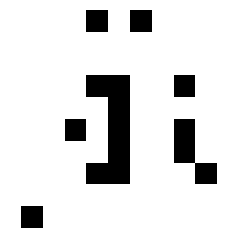

no of generation: 91
16777216


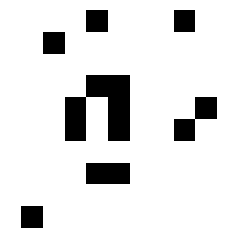

no of generation: 92
268435456


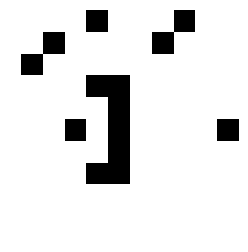

no of generation: 93
1048576


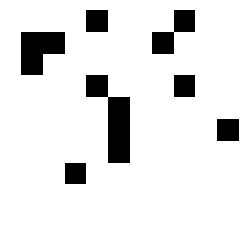

no of generation: 94
1048576


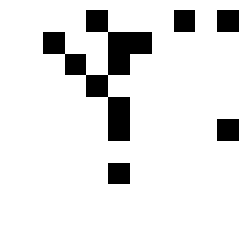

no of generation: 95
1048576


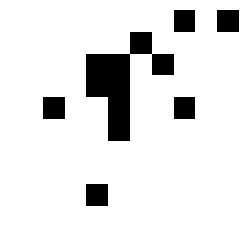

no of generation: 96
16777216


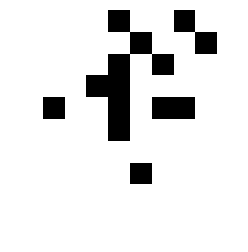

no of generation: 97
16777216


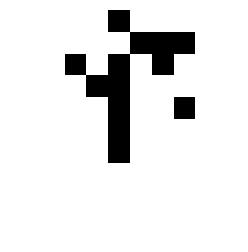

no of generation: 98
16777216


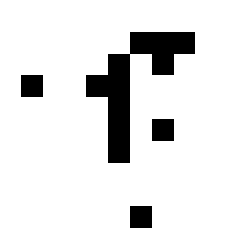

no of generation: 99
16777216


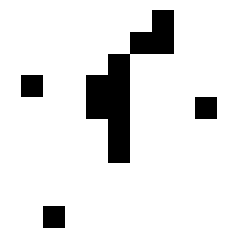

no of generation: 100
268435456


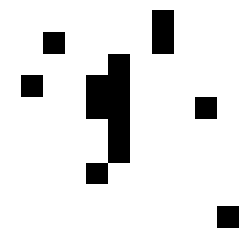

no of generation: 101
16777216


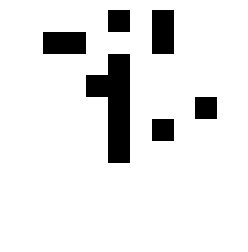

no of generation: 102
16777216


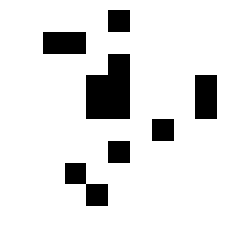

no of generation: 103
1048576


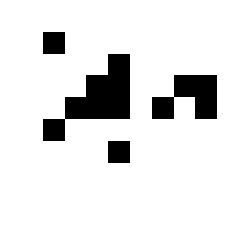

no of generation: 104
1048576


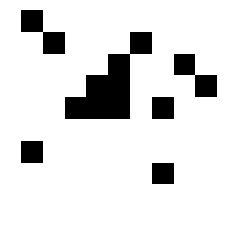

no of generation: 105
1048576


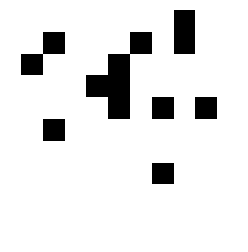

no of generation: 106
1048576


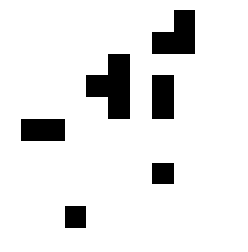

no of generation: 107
1048576


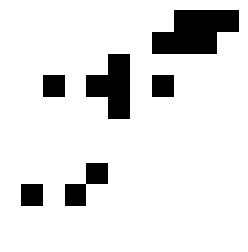

no of generation: 108
268435456


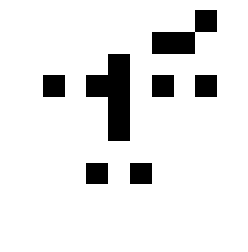

no of generation: 109
16777216


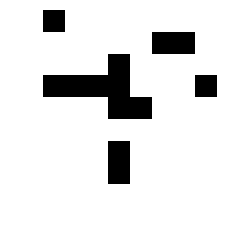

no of generation: 110
16777216


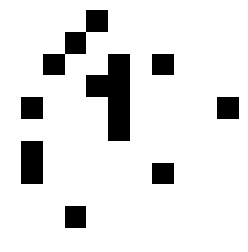

no of generation: 111
16777216


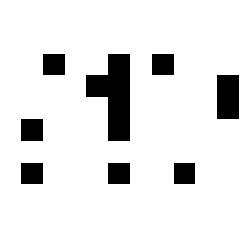

no of generation: 112
268435456


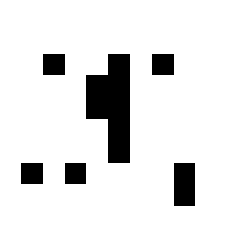

no of generation: 113
268435456


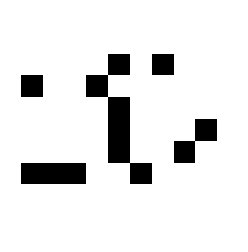

no of generation: 114
16777216


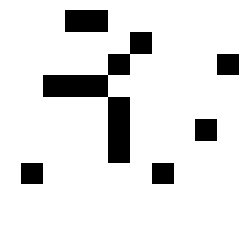

no of generation: 115
1048576


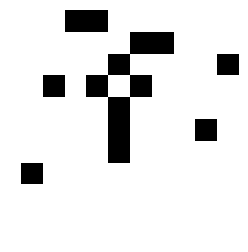

no of generation: 116
1048576


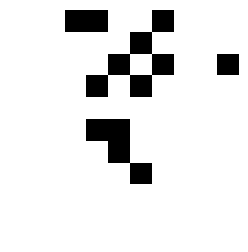

no of generation: 117
1048576


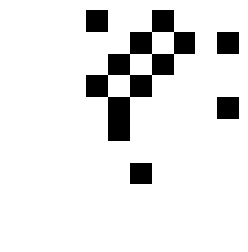

no of generation: 118
16777216


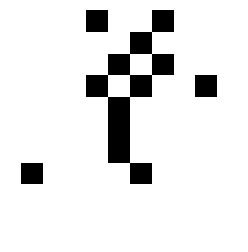

no of generation: 119
16777216


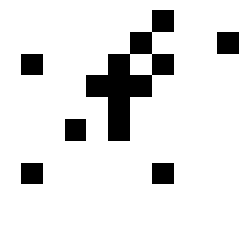

no of generation: 120
16777216


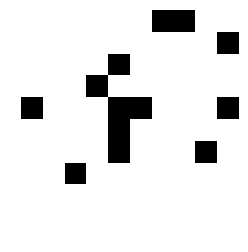

no of generation: 121
16777216


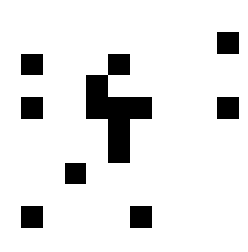

no of generation: 122
16777216


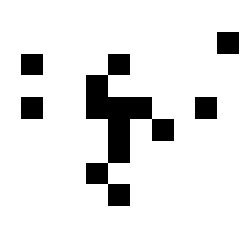

no of generation: 123
16777216


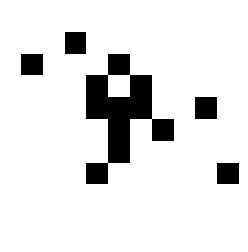

no of generation: 124
16777216


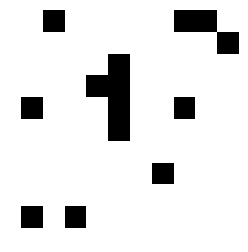

no of generation: 125
268435456


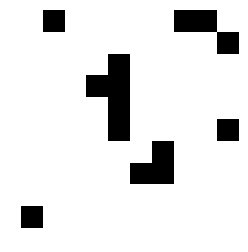

no of generation: 126
16777216


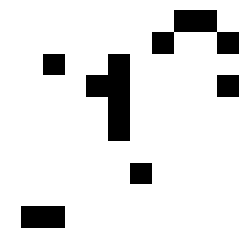

no of generation: 127
268435456


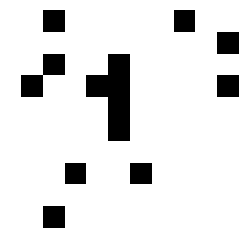

no of generation: 128
268435456


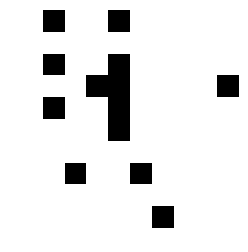

no of generation: 129
4294967296


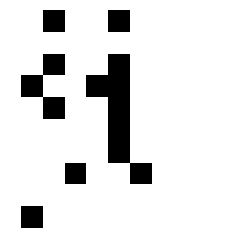

no of generation: 130
16777216


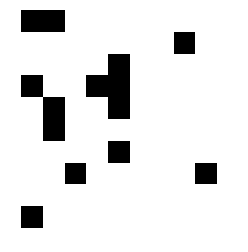

no of generation: 131
16777216


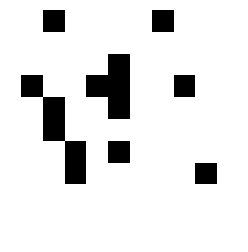

no of generation: 132
16777216


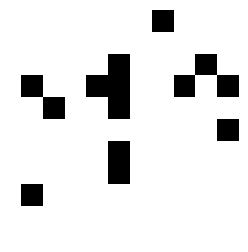

no of generation: 133
16777216


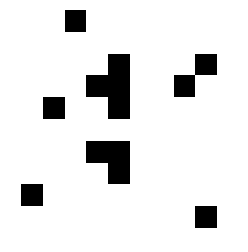

no of generation: 134
16777216


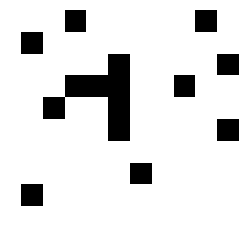

no of generation: 135
1048576


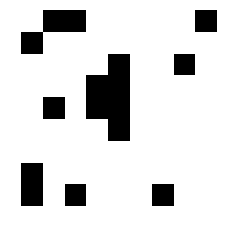

no of generation: 136
16777216


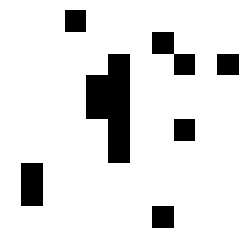

no of generation: 137
268435456


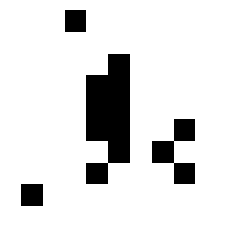

no of generation: 138
268435456


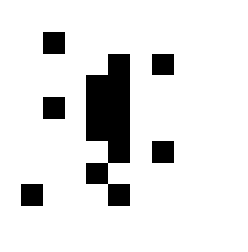

no of generation: 139
268435456


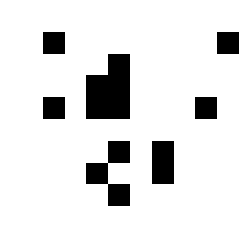

no of generation: 140
268435456


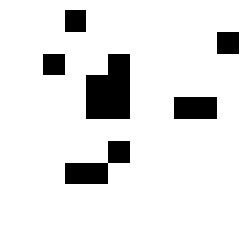

no of generation: 141
16777216


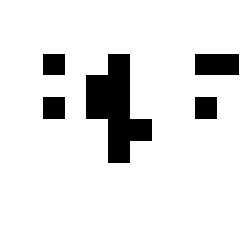

no of generation: 142
16777216


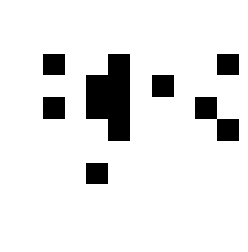

no of generation: 143
16777216


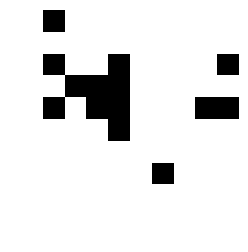

no of generation: 144
16777216


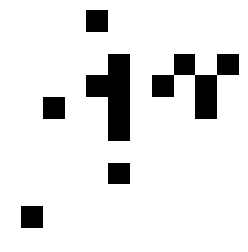

no of generation: 145
16777216


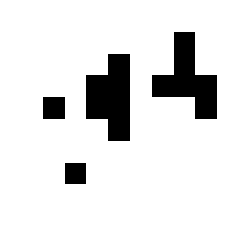

no of generation: 146
1048576


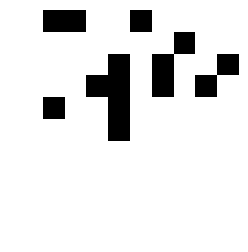

no of generation: 147
1048576


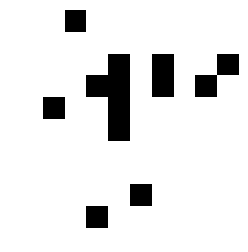

no of generation: 148
16777216


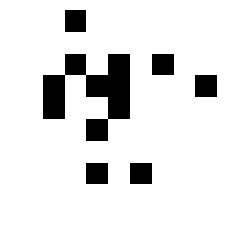

no of generation: 149
16777216


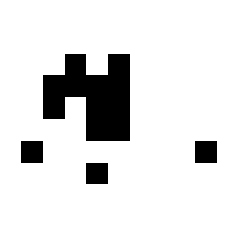

no of generation: 150
16777216


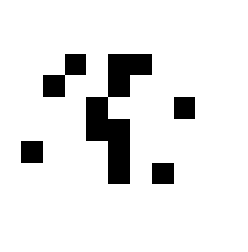

no of generation: 151
1048576


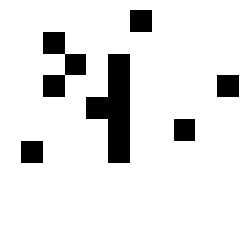

no of generation: 152
1048576


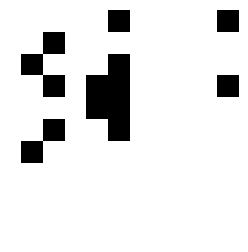

no of generation: 153
1048576


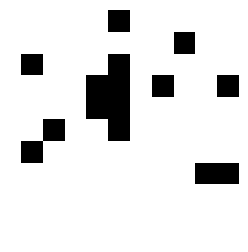

no of generation: 154
1048576


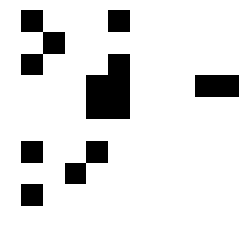

no of generation: 155
1048576


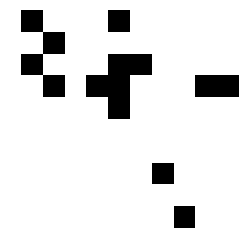

no of generation: 156
1048576


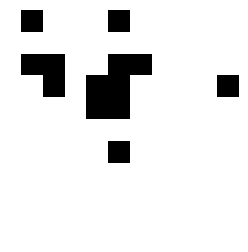

no of generation: 157
1048576


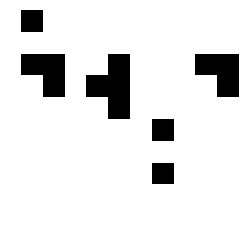

no of generation: 158
1048576


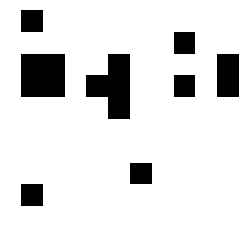

no of generation: 159
1048576


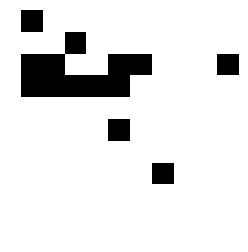

no of generation: 160
1048576


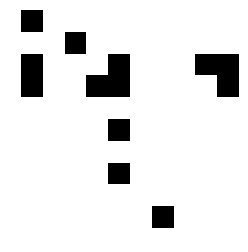

no of generation: 161
268435456


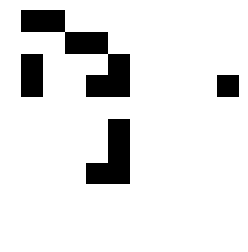

no of generation: 162
16777216


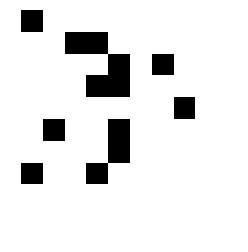

no of generation: 163
16777216


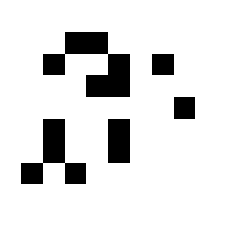

no of generation: 164
1048576


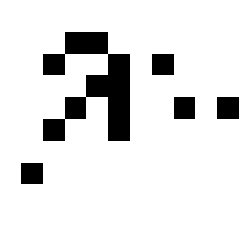

no of generation: 165
1048576


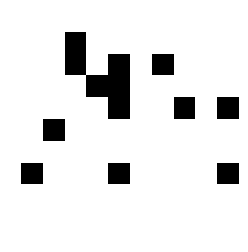

no of generation: 166
1048576


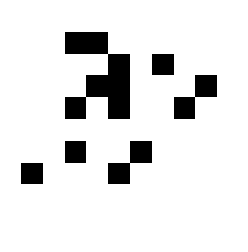

no of generation: 167
1048576


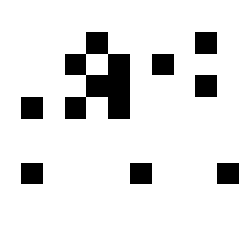

no of generation: 168
1048576


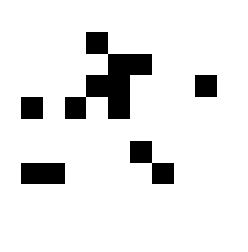

no of generation: 169
1048576


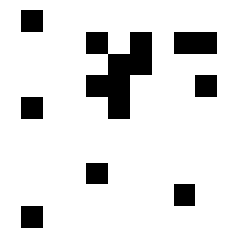

no of generation: 170
1048576


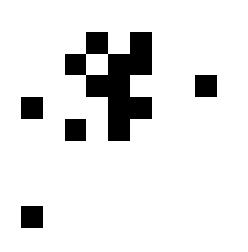

no of generation: 171
1048576


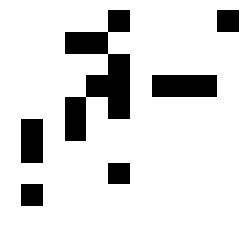

no of generation: 172
65536


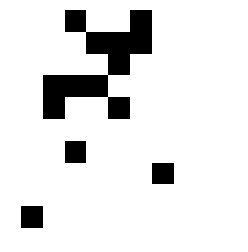

no of generation: 173
65536


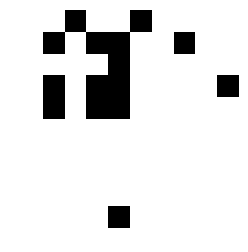

no of generation: 174
65536


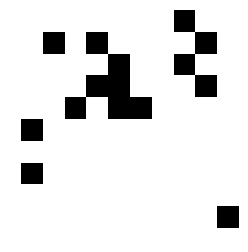

no of generation: 175
1048576


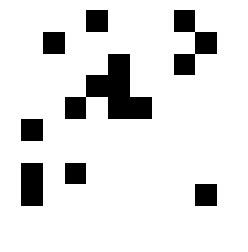

no of generation: 176
1048576


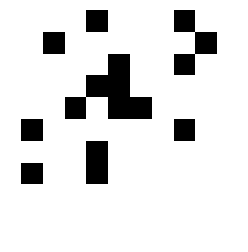

no of generation: 177
1048576


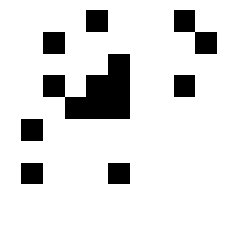

no of generation: 178
1048576


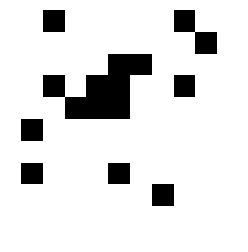

no of generation: 179
1048576


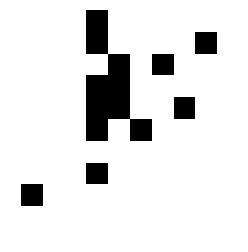

no of generation: 180
1048576


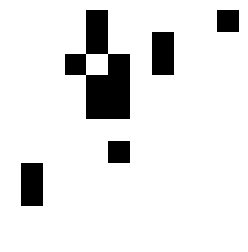

no of generation: 181
1048576


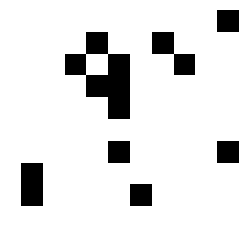

no of generation: 182
16777216


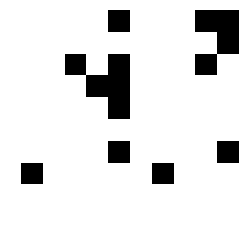

no of generation: 183
16777216


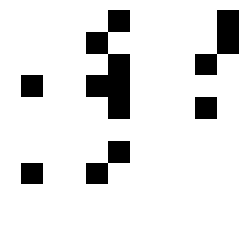

no of generation: 184
16777216


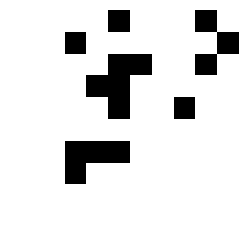

no of generation: 185
1048576


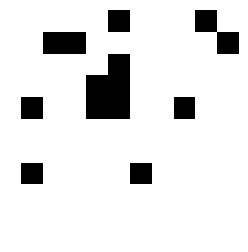

no of generation: 186
65536


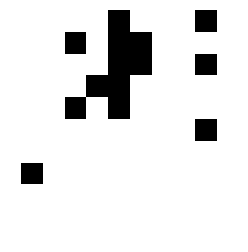

no of generation: 187
1048576


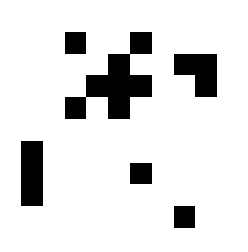

no of generation: 188
65536


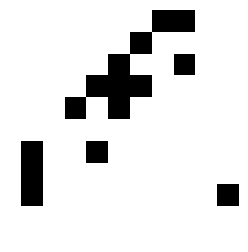

no of generation: 189
16777216


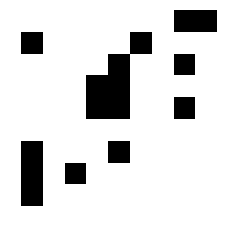

no of generation: 190
1048576


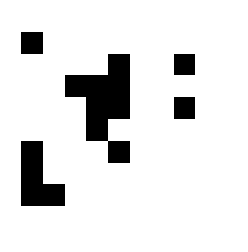

no of generation: 191
1048576


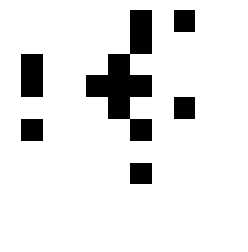

no of generation: 192
1048576


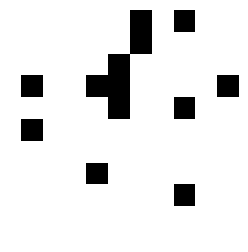

no of generation: 193
16777216


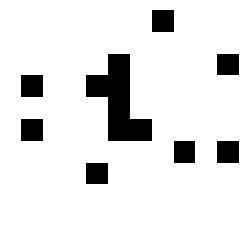

no of generation: 194
16777216


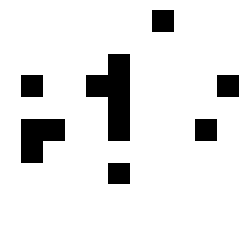

no of generation: 195
16777216


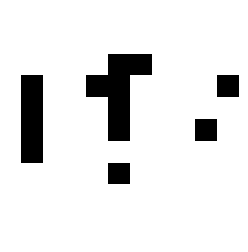

no of generation: 196
1048576


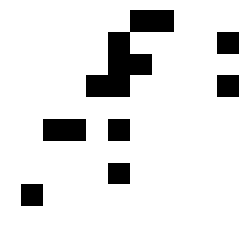

no of generation: 197
1048576


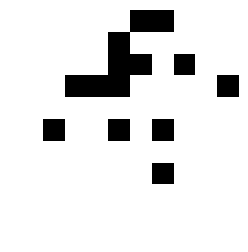

no of generation: 198
1048576


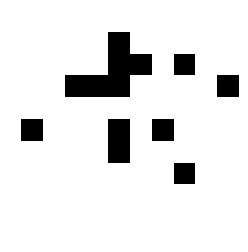

no of generation: 199
1048576


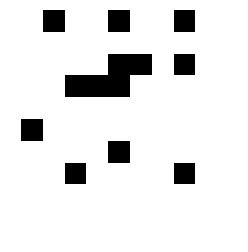

no of generation: 200
16777216


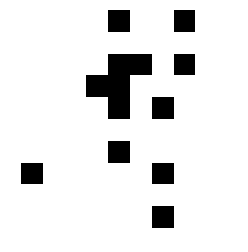

no of generation: 201
16777216


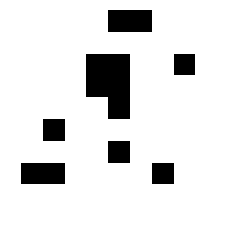

no of generation: 202
268435456


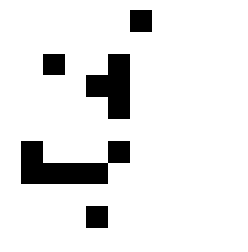

no of generation: 203
4294967296


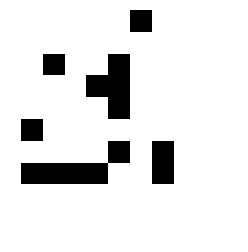

no of generation: 204
16777216


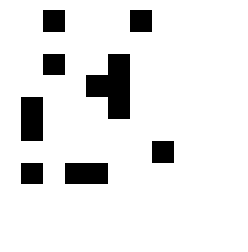

no of generation: 205
16777216


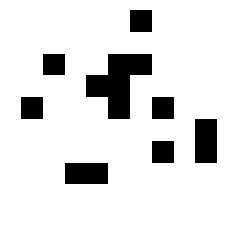

no of generation: 206
16777216


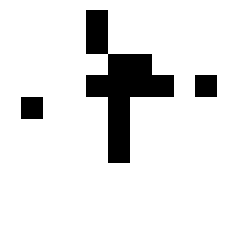

no of generation: 207
16777216


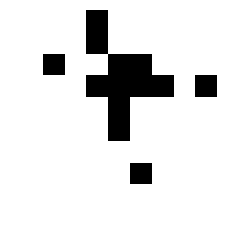

no of generation: 208
16777216


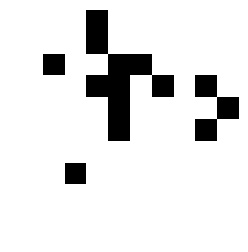

no of generation: 209
1048576


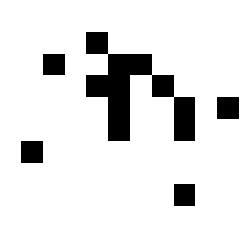

no of generation: 210
16777216


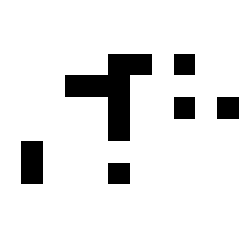

no of generation: 211
16777216


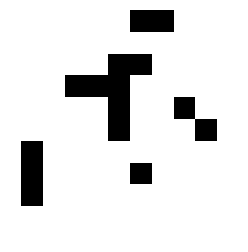

no of generation: 212
16777216


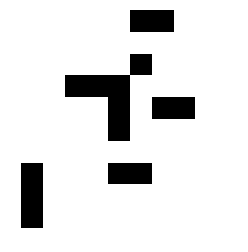

no of generation: 213
16777216


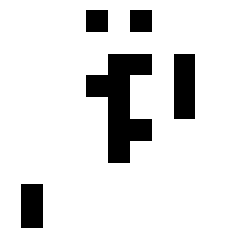

no of generation: 214
268435456


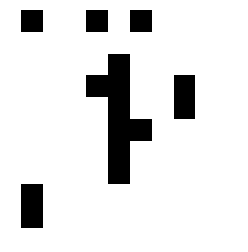

no of generation: 215
268435456


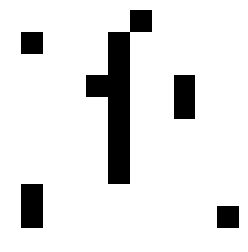

no of generation: 216
268435456


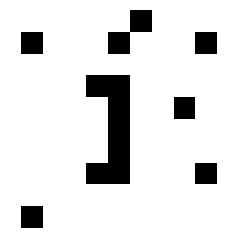

no of generation: 217
268435456


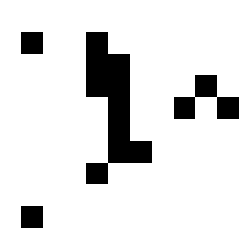

no of generation: 218
16777216


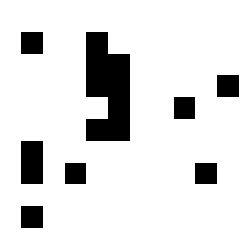

no of generation: 219
16777216


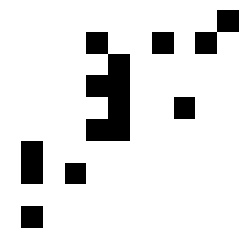

no of generation: 220
16777216


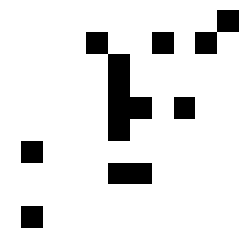

no of generation: 221
16777216


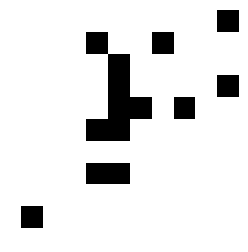

no of generation: 222
1048576


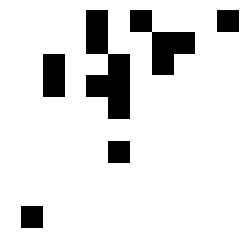

no of generation: 223
16777216


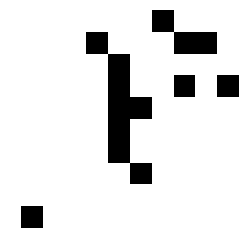

no of generation: 224
16777216


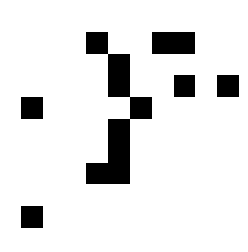

no of generation: 225
1048576


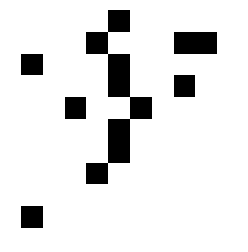

no of generation: 226
65536


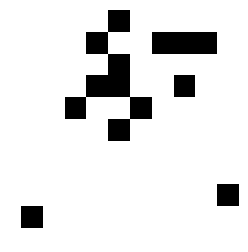

no of generation: 227
1048576


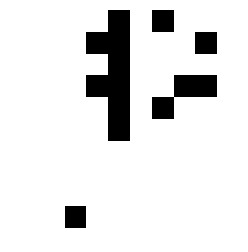

no of generation: 228
16777216


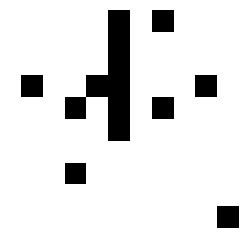

no of generation: 229
16777216


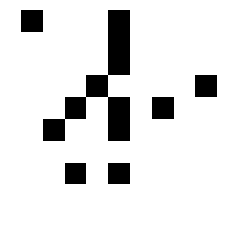

no of generation: 230
1048576


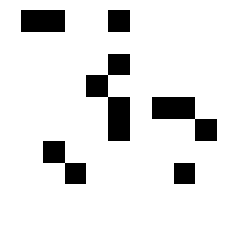

no of generation: 231
1048576


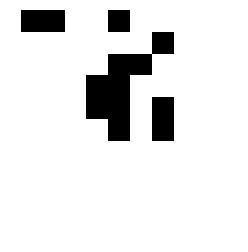

no of generation: 232
16777216


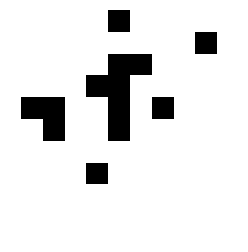

no of generation: 233
1048576


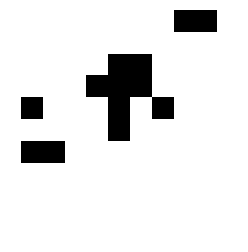

no of generation: 234
16777216


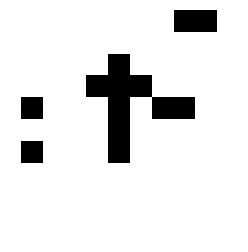

no of generation: 235
1048576


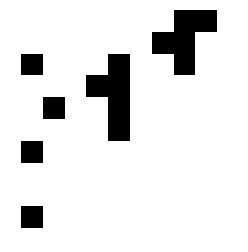

no of generation: 236
1048576


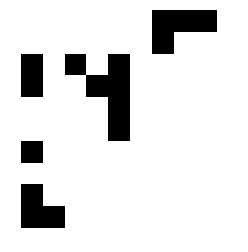

no of generation: 237
1048576


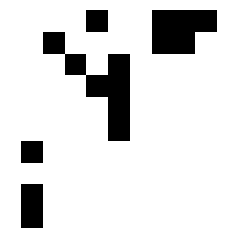

no of generation: 238
1048576


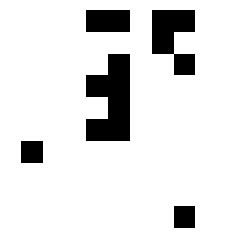

no of generation: 239
1048576


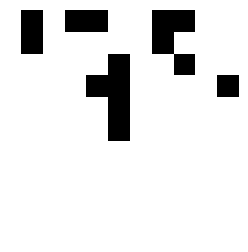

no of generation: 240
65536


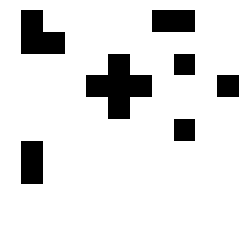

no of generation: 241
65536


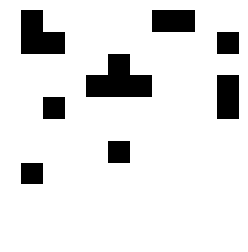

no of generation: 242
65536


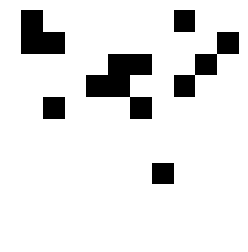

no of generation: 243
65536


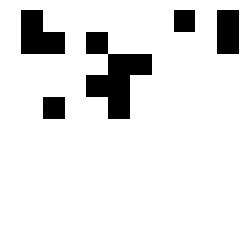

no of generation: 244
16777216


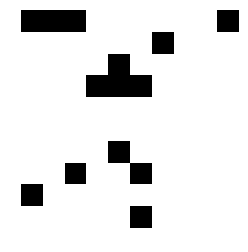

no of generation: 245
16777216


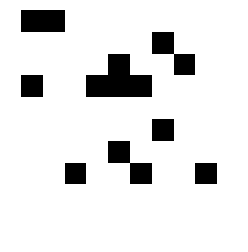

no of generation: 246
16777216


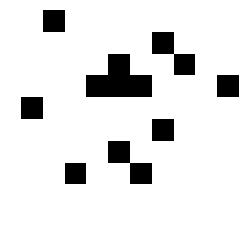

no of generation: 247
16777216


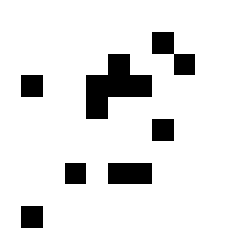

no of generation: 248
1048576


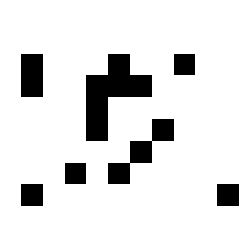

no of generation: 249
1048576


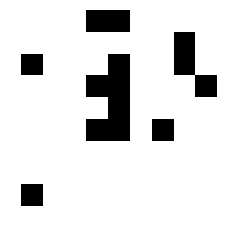

no of generation: 250
16777216


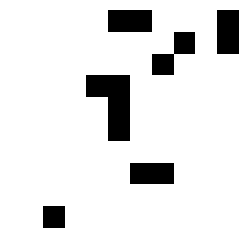

no of generation: 251
268435456


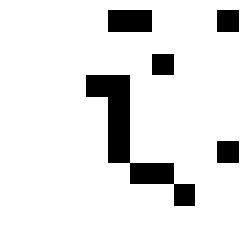

no of generation: 252
16777216


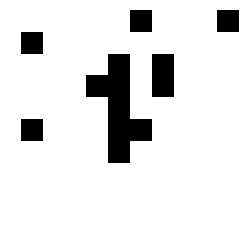

no of generation: 253
1048576


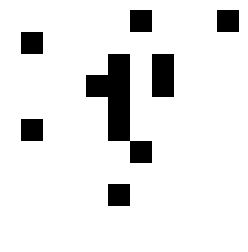

no of generation: 254
16777216


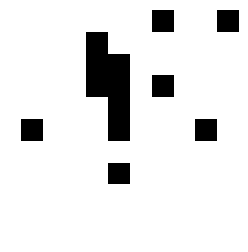

no of generation: 255
16777216


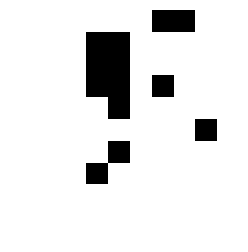

no of generation: 256
1048576


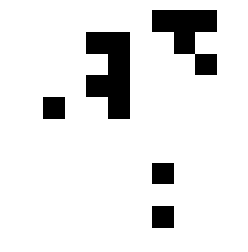

no of generation: 257
1048576


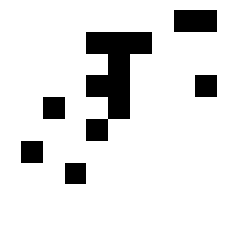

no of generation: 258
1048576


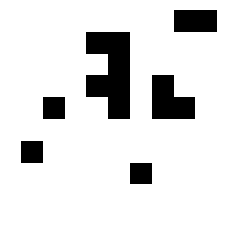

no of generation: 259
1048576


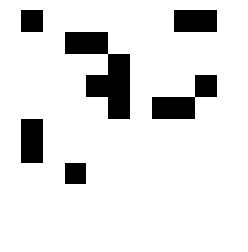

no of generation: 260
1048576


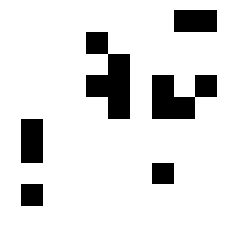

no of generation: 261
1048576


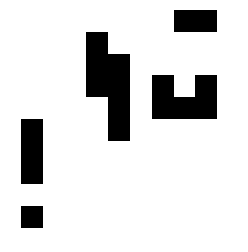

no of generation: 262
1048576


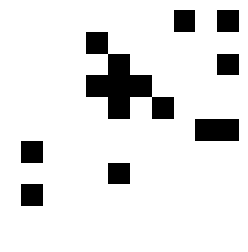

no of generation: 263
16777216


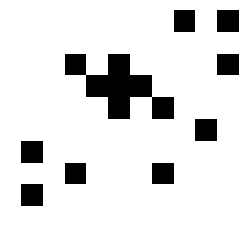

no of generation: 264
1048576


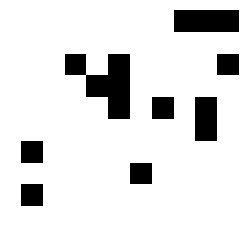

no of generation: 265
1048576


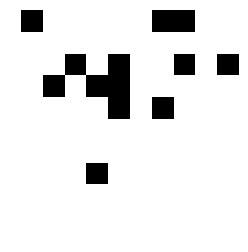

no of generation: 266
1048576


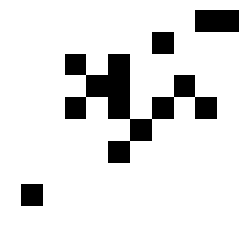

no of generation: 267
16777216


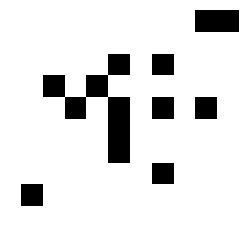

no of generation: 268
16777216


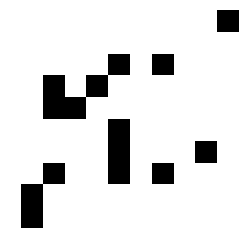

no of generation: 269
16777216


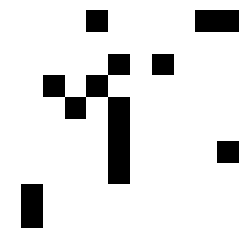

no of generation: 270
16777216


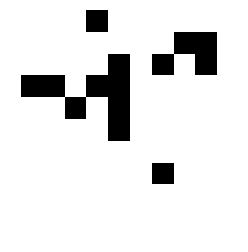

no of generation: 271
1048576


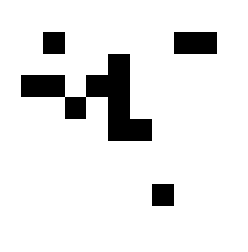

no of generation: 272
16777216


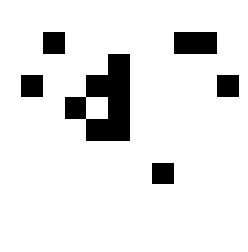

no of generation: 273
16777216


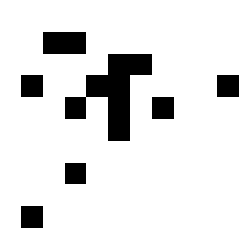

no of generation: 274
16777216


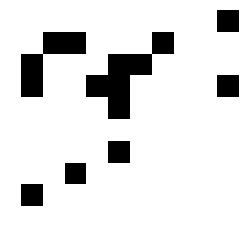

no of generation: 275
1048576


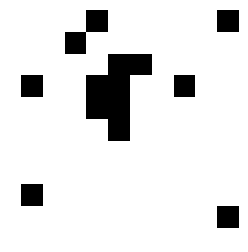

no of generation: 276
16777216


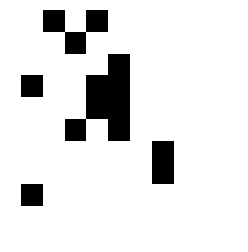

no of generation: 277
16777216


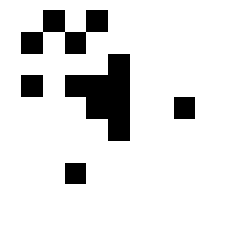

no of generation: 278
1048576


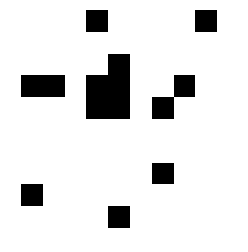

no of generation: 279
1048576


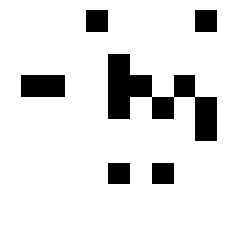

no of generation: 280
1048576


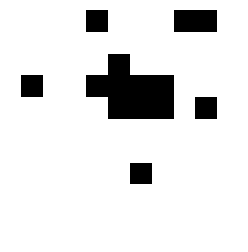

no of generation: 281
16777216


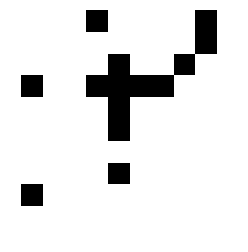

no of generation: 282
268435456


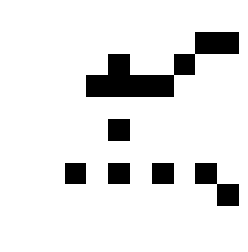

no of generation: 283
268435456


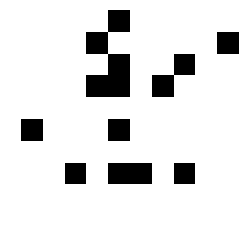

no of generation: 284
4294967296


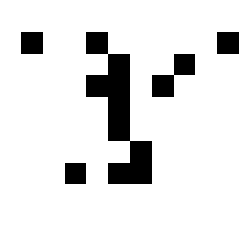

no of generation: 285
16777216


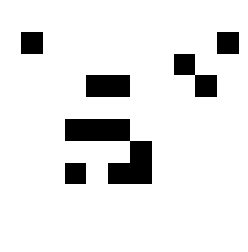

no of generation: 286
1048576


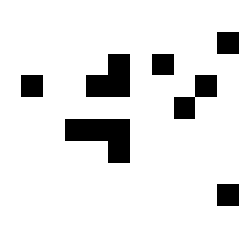

no of generation: 287
1048576


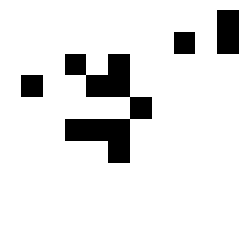

no of generation: 288
1048576


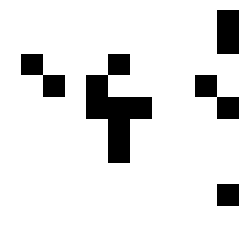

no of generation: 289
1048576


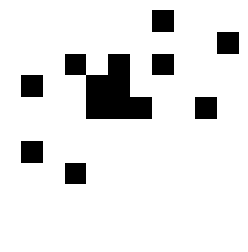

no of generation: 290
65536


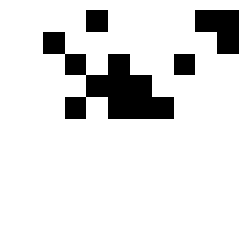

no of generation: 291
65536


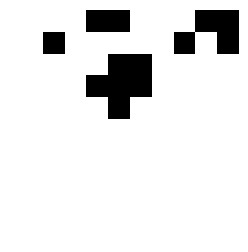

no of generation: 292
1048576


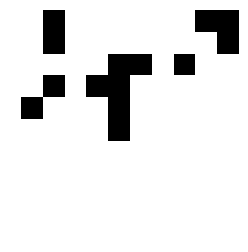

no of generation: 293
1048576


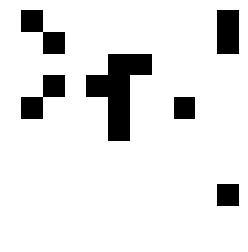

no of generation: 294
16777216


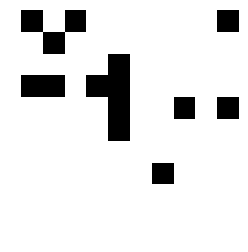

no of generation: 295
1048576


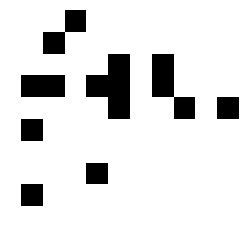

no of generation: 296
1048576


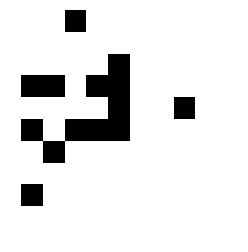

no of generation: 297
16777216


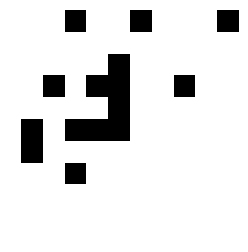

no of generation: 298
1048576


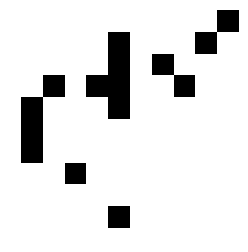

no of generation: 299
1048576


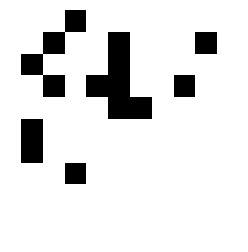

no of generation: 300
1048576


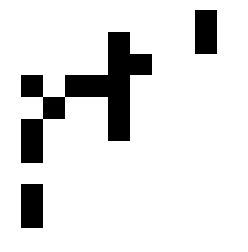

no of generation: 301
1048576


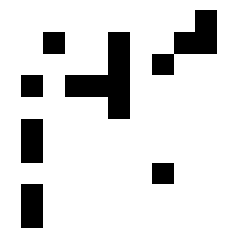

no of generation: 302
1048576


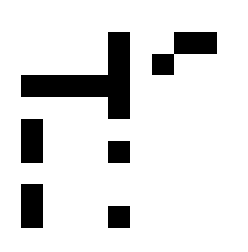

no of generation: 303
65536


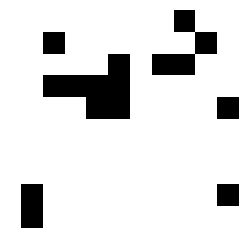

no of generation: 304
1048576


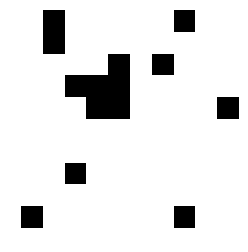

no of generation: 305
16777216


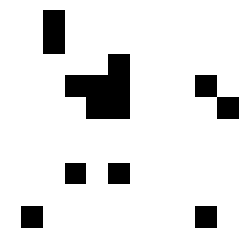

no of generation: 306
16777216


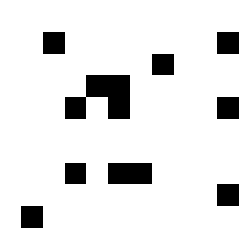

no of generation: 307
268435456


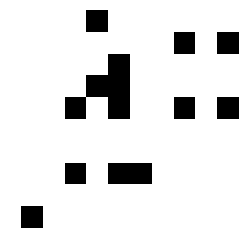

no of generation: 308
16777216


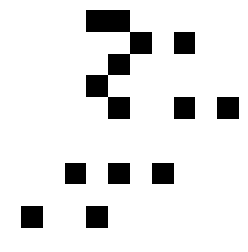

no of generation: 309
16777216


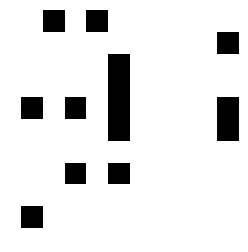

no of generation: 310
1048576


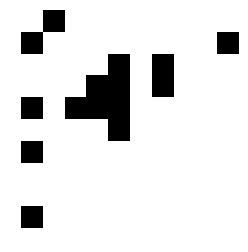

no of generation: 311
1048576


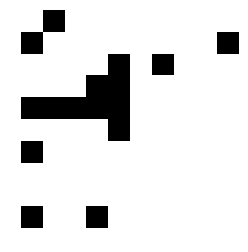

no of generation: 312
1048576


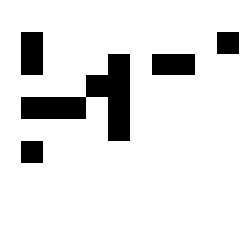

no of generation: 313
1048576


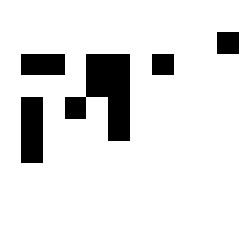

no of generation: 314
1048576


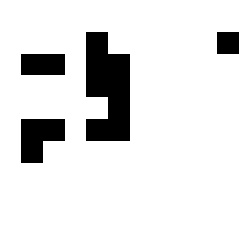

no of generation: 315
1048576


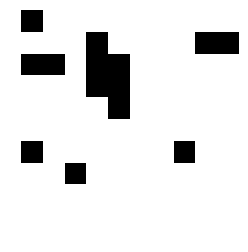

no of generation: 316
1048576


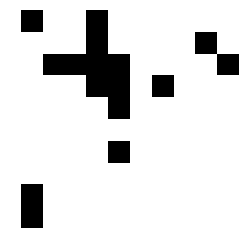

no of generation: 317
1048576


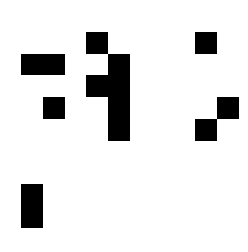

no of generation: 318
16777216


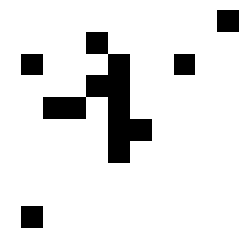

no of generation: 319
16777216


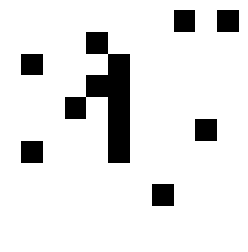

no of generation: 320
16777216


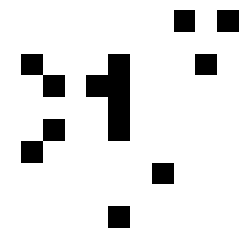

no of generation: 321
16777216


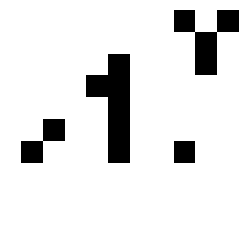

no of generation: 322
268435456


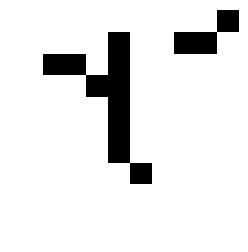

no of generation: 323
268435456


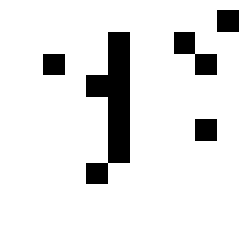

no of generation: 324
16777216


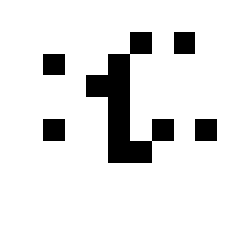

no of generation: 325
16777216


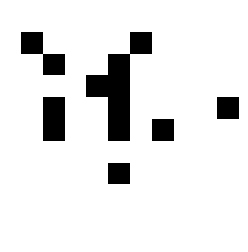

no of generation: 326
16777216


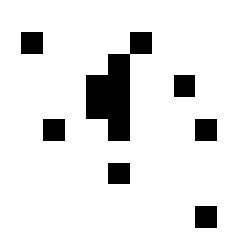

no of generation: 327
16777216


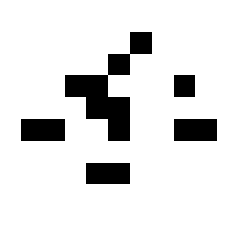

no of generation: 328
1048576


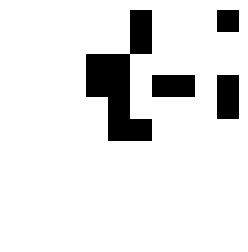

no of generation: 329
16777216


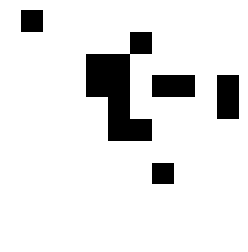

no of generation: 330
1048576


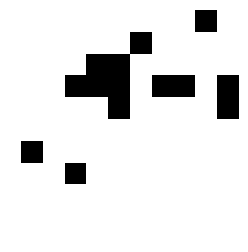

no of generation: 331
1048576


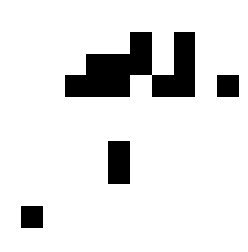

no of generation: 332
1048576


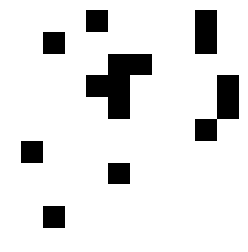

no of generation: 333
16777216


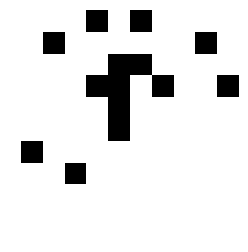

no of generation: 334
1048576


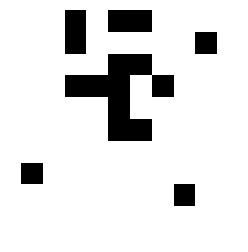

no of generation: 335
1048576


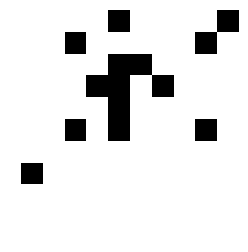

no of generation: 336
1048576


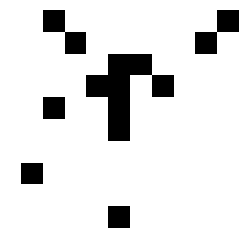

no of generation: 337
16777216


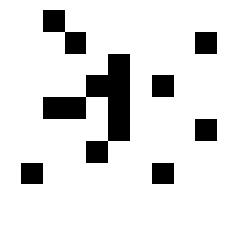

no of generation: 338
1048576


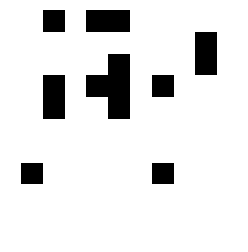

no of generation: 339
1048576


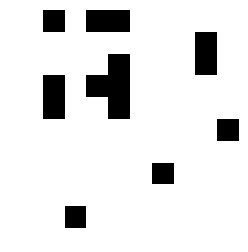

no of generation: 340
1048576


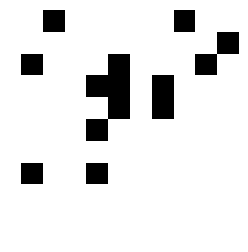

no of generation: 341
1048576


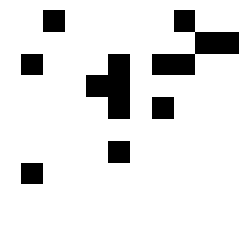

no of generation: 342
16777216


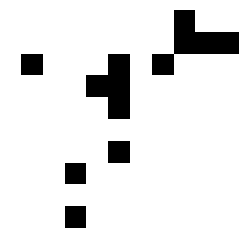

no of generation: 343
16777216


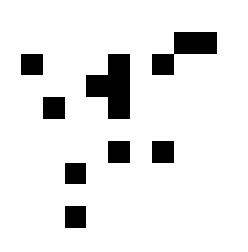

no of generation: 344
268435456


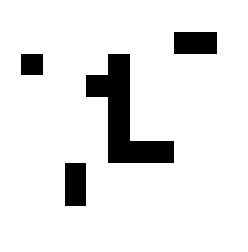

no of generation: 345
268435456


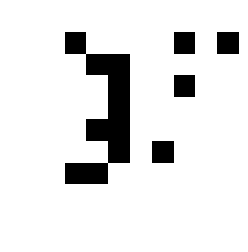

no of generation: 346
16777216


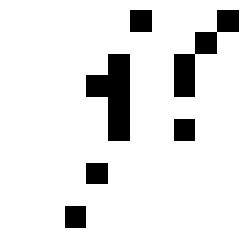

no of generation: 347
16777216


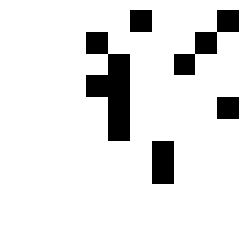

no of generation: 348
268435456


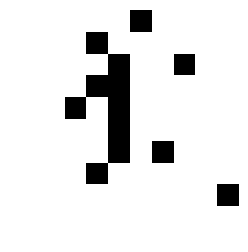

no of generation: 349
268435456


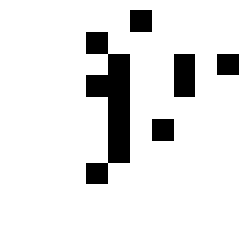

no of generation: 350
268435456


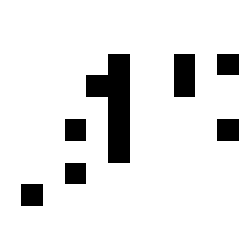

no of generation: 351
16777216


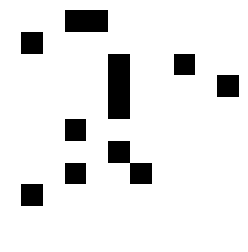

no of generation: 352
1048576


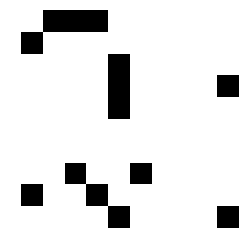

no of generation: 353
16777216


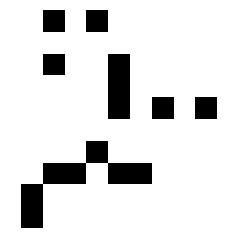

no of generation: 354
16777216


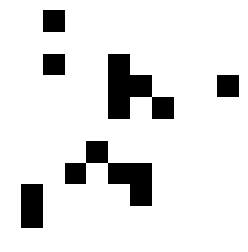

no of generation: 355
1048576


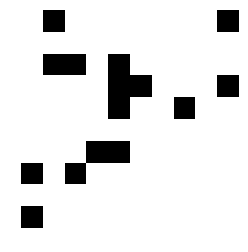

no of generation: 356
1048576


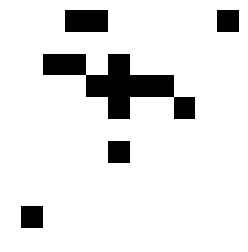

no of generation: 357
16777216


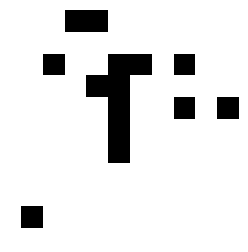

no of generation: 358
268435456


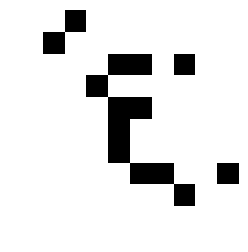

no of generation: 359
268435456


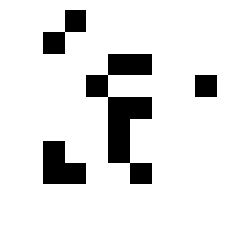

no of generation: 360
268435456


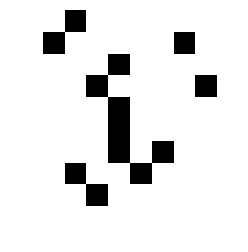

no of generation: 361
268435456


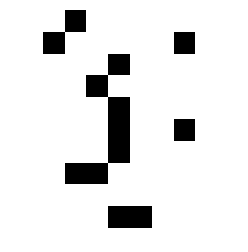

no of generation: 362
268435456


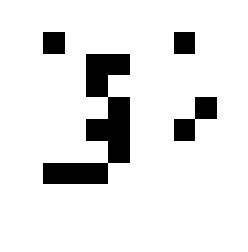

no of generation: 363
16777216


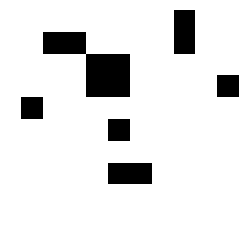

no of generation: 364
1048576


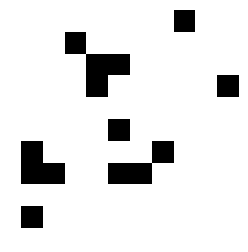

no of generation: 365
65536


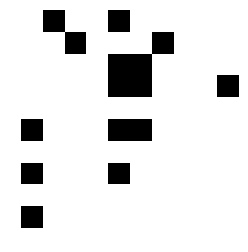

no of generation: 366
1048576


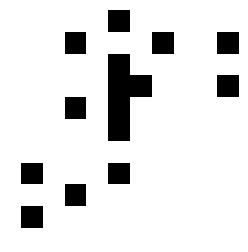

no of generation: 367
16777216


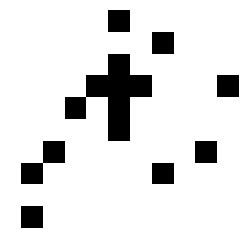

no of generation: 368
16777216


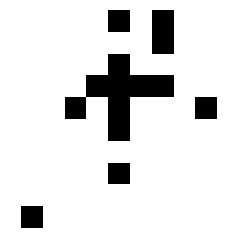

no of generation: 369
16777216


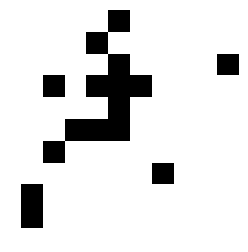

no of generation: 370
1048576


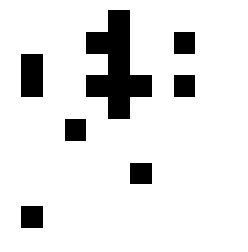

no of generation: 371
1048576


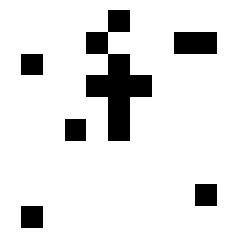

no of generation: 372
1048576


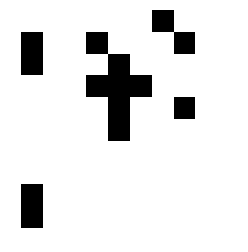

no of generation: 373
16777216


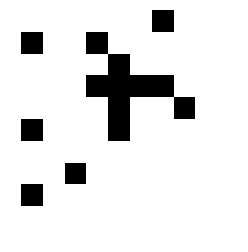

no of generation: 374
16777216


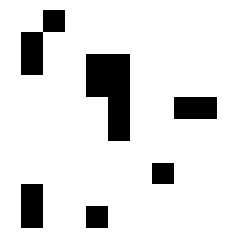

no of generation: 375
16777216


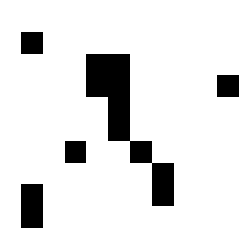

no of generation: 376
16777216


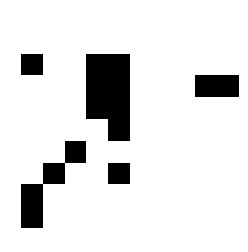

no of generation: 377
1048576


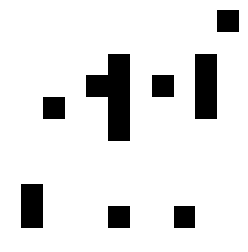

no of generation: 378
16777216


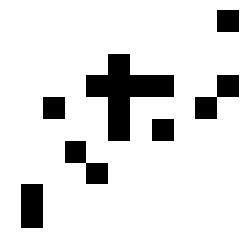

no of generation: 379
1048576


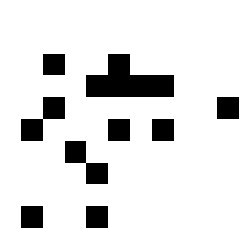

no of generation: 380
1048576


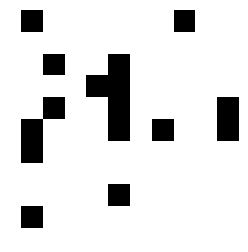

no of generation: 381
16777216


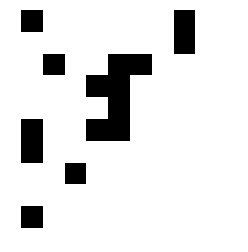

no of generation: 382
16777216


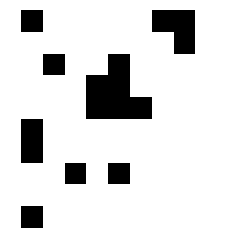

no of generation: 383
1048576


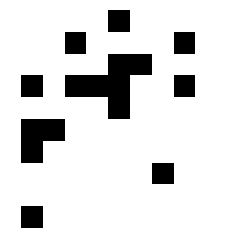

no of generation: 384
1048576


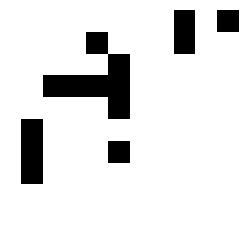

no of generation: 385
1048576


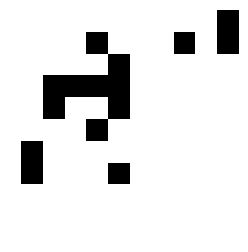

no of generation: 386
1048576


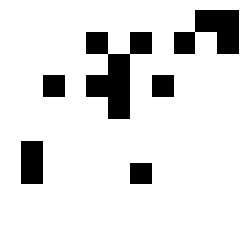

no of generation: 387
65536


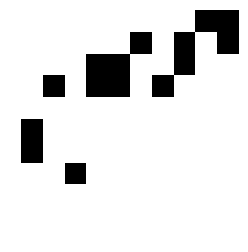

no of generation: 388
65536


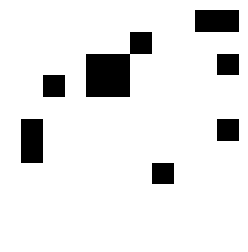

no of generation: 389
65536


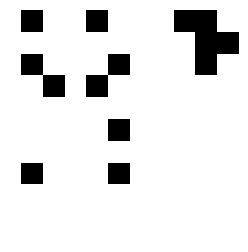

no of generation: 390
65536


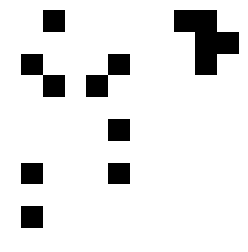

no of generation: 391
1048576


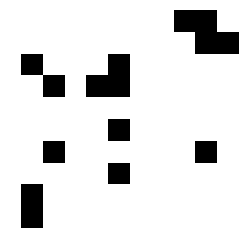

no of generation: 392
268435456


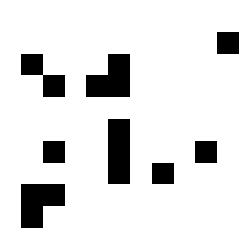

no of generation: 393
4294967296


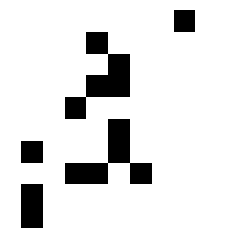

no of generation: 394
268435456


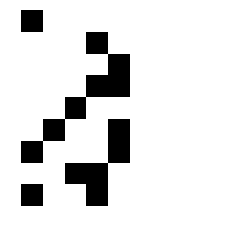

no of generation: 395
16777216


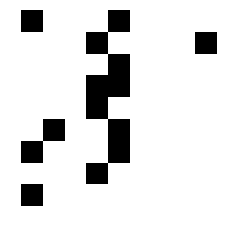

no of generation: 396
16777216


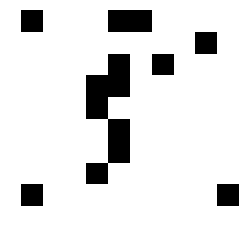

no of generation: 397
16777216


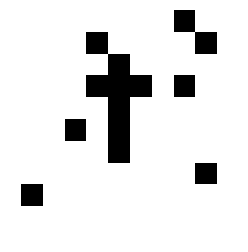

no of generation: 398
16777216


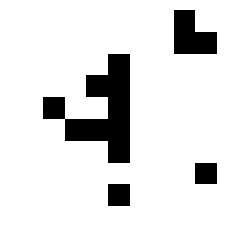

no of generation: 399
16777216


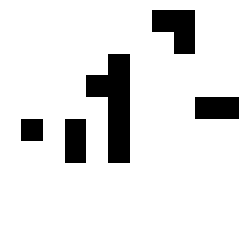

no of generation: 400
16777216


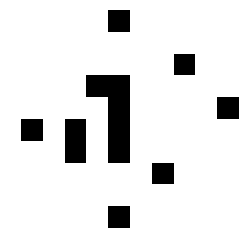

no of generation: 401
4294967296


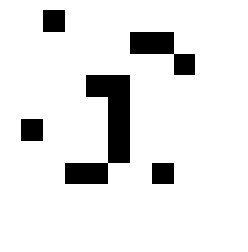

no of generation: 402
268435456


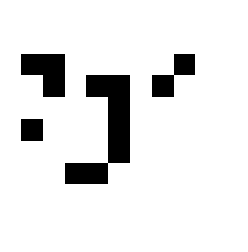

no of generation: 403
16777216


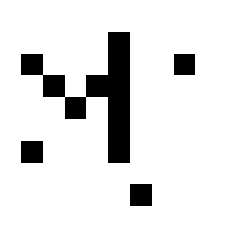

no of generation: 404
268435456


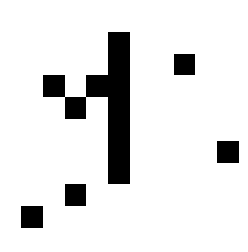

no of generation: 405
268435456


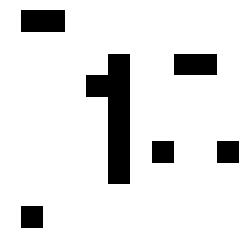

no of generation: 406
268435456


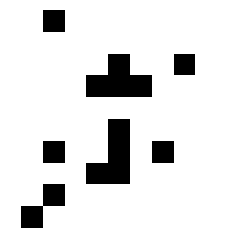

no of generation: 407
268435456


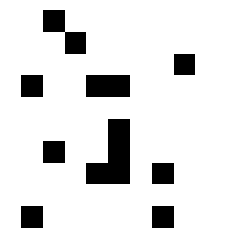

no of generation: 408
4294967296


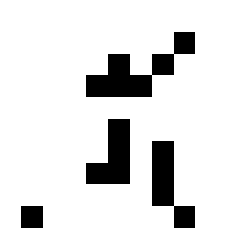

no of generation: 409
268435456


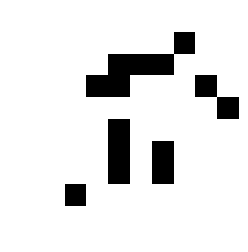

no of generation: 410
268435456


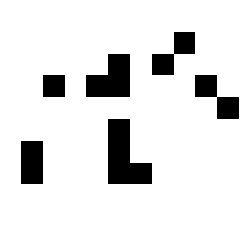

no of generation: 411
16777216


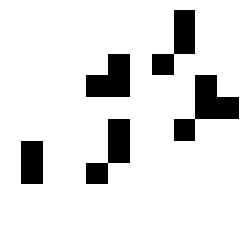

no of generation: 412
16777216


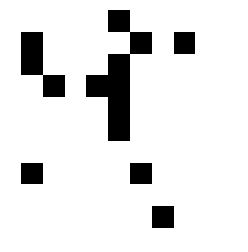

no of generation: 413
16777216


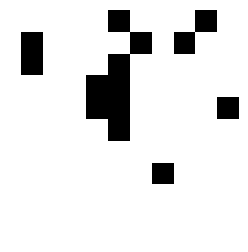

no of generation: 414
16777216


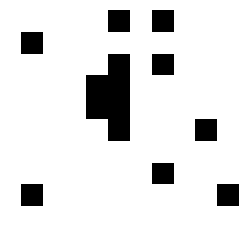

no of generation: 415
16777216


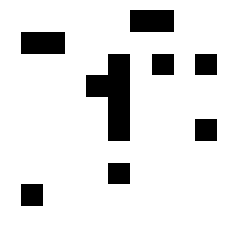

no of generation: 416
16777216


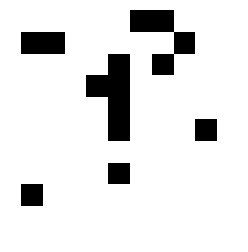

no of generation: 417
16777216


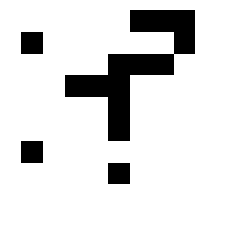

no of generation: 418
16777216


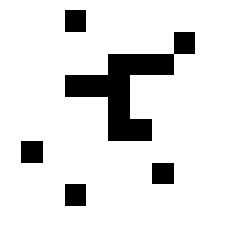

no of generation: 419
16777216


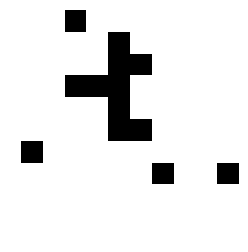

no of generation: 420
16777216


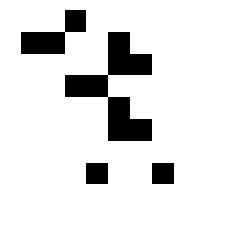

no of generation: 421
1048576


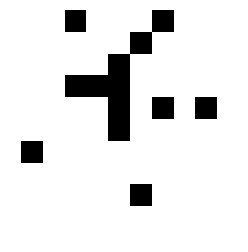

no of generation: 422
1048576


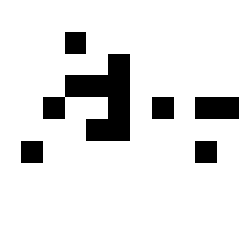

no of generation: 423
16777216


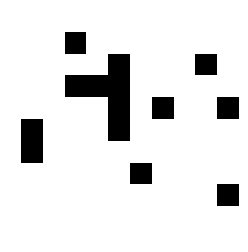

no of generation: 424
16777216


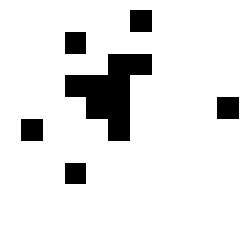

no of generation: 425
268435456


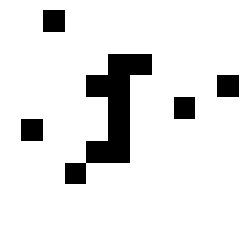

no of generation: 426
268435456


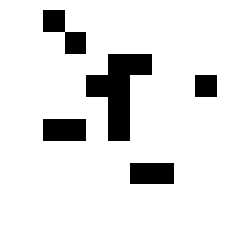

no of generation: 427
16777216


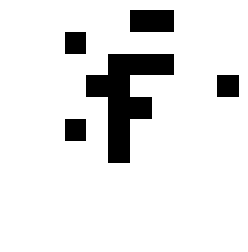

no of generation: 428
16777216


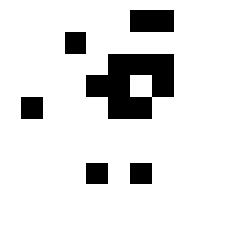

no of generation: 429
16777216


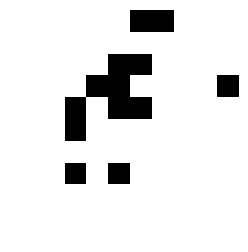

no of generation: 430
16777216


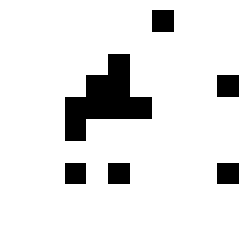

no of generation: 431
16777216


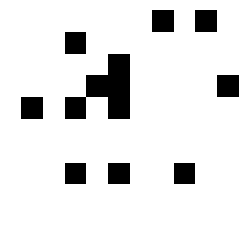

no of generation: 432
268435456


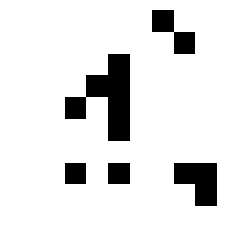

no of generation: 433
4294967296


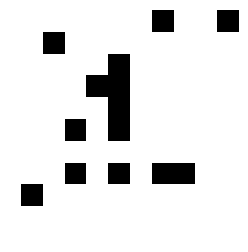

no of generation: 434
4294967296


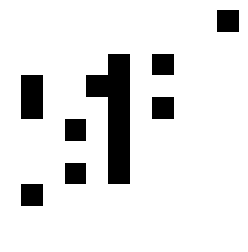

no of generation: 435
4294967296


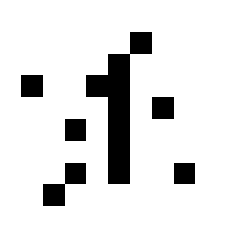

no of generation: 436
268435456


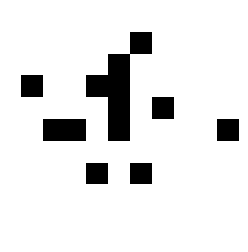

no of generation: 437
268435456


KeyboardInterrupt: 

In [180]:
#img = Image.open('test.png')
img = cv2.imread('test.png',0)
black_target = []
for i in range(len(img)):
    for j in range(len(img[0])):
        
        
        if(img[i][j] == 255):

            img[i][j] = 1
        else:
            black_target.append([i,j])

#plt.imshow(newPopulation(3,target)[0], interpolation = "nearest")
#plt.show()
target = img
pop_max = 50
num_of_points = 12
pop = newPopulation(pop_max, target, num_of_points)

count=0
flag = 1
while(flag == 1):
    count+=1
    
    population_fitness = populationFitness(pop, target)
    
    pool = matingPool(population_fitness)

    
    pop,population_points=createChildren(pool, pop_max, num_of_points,population_fitness[0])
    
    pop=mutatePopulation(pop, 100, population_points,black_target)
    print("no of generation:",count)
    max = 0
    max_i = pop[0]
    for i in pop:
#         if(fitness(i, target) > 10000 ):
#             #flag = 0
#             print("good:",count)
            
        if(fitness(i, target) > max):
            max = fitness(i, target)
            max_i = i
    print(fitness(max_i, target))
    plt.imshow(max_i, cmap = plt.cm.gray)
    plt.axis("off")
    #plt.imshow(max_i,interpolation='nearest')
    #plt.pause(0.001)        
    plt.show()


In [73]:
random.random()


0.8666635474829743

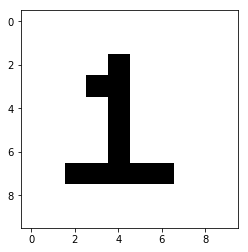

In [113]:
plt.imshow(target, cmap = plt.cm.gray)
plt.show()
